# Outbreak  of _simulitis_ and the SIR model

ver. 20200426 A.Lundervold  (**work in progress**)

Last updated: 2024-01-18 (using the `bmed365` conda environment)

Motivated and modified from **Max Bergren's** "[Model of a zombie outbreak in Sweden, Norway and Finland (Denmark is fine)](http://maxberggren.se/2014/11/27/model-of-a-zombie-outbreak)" (Nov 27, 2014)<br>
(https://github.com/maxberggren/blog-notebooks/blob/master/SweEbola.ipynb) and other sources.

## Learning outcome:


 - The power of Python, numerical models, and matplotlib to make interesting simulations and visualizations.
 
 
 - Numerical solution of spatio-temporal compartment models (*space* is a population density map of the Nordic countries; *time* or dynamics is the [Suceptible -> Infections -> Recovered] *SIR* epidemiological model).
 
 
 - The similarity between the **SIR model** based on epidemiological observations  (assuming "conservation of population" acroos S, I, and R), and a compartment model for **[glomerular filtration rate (GFR) model](https://github.com/arvidl/functional-kidney-imaging/blob/master/syllabus-eposter-esmrmb2016/lundervold_measurment_of_renal_perfusion_and_filtration_esmrmb_vienna_20160929_eposter_pptx.pdf)** for the kidney based on DCE-MRI and tracer kinetics (assuming "conservation of mass" across anatomical compartments).


## Theory

Inspired by Jason Cole at [Almost Looks Like Work](https://jasmcole.com) [[Going viral](http://jasmcole.com/2014/10/19/going-viral)] Max Berggren wanted to take on some modeling of disease spread. Note that this model has no claim what so ever on reflecting reality and is not to be mistaken for the Ebola epidemic in West Africa or the COVID-19. On the contrary, it's more to be viewed as some sort of fictional _simulitis_ outbreak. That said, let's assume:

Each member of the population typically progresses from **susceptible** ($S$) to **infectious** ($I$) to **recovered** ($R$). This can be shown as a flow diagram in which the boxes represent the different **compartments** and the arrows the **transition** between compartments, i.e.

![SIR](./assets/SIR_Flow_Diagram.png)

Such **compartment model** is dynamic in that the numbers in each compartment may fluctuate over time. Moreover, the dynamics of an epidemic, for example the flu (or measles in the UK prior to the introduction of a vaccine in 1968), are often much faster than the dynamics of birth and death, therefore, birth and death are often omitted in simple compartmental models. The SIR system without so-called vital dynamics (birth and death, sometimes called demography) described above can be expressed by the following **set of coupled ordinary differential equations (ODEs)**:

$$ 
\begin{align}
u(t) & = \begin{pmatrix} S(t) \\ I(t) \\ R(t) \end{pmatrix} & f(u)   = u'(t) = \begin{pmatrix} S' \\ I' \\ R' \end{pmatrix}  = \begin{pmatrix}
  -\frac{\beta I(t) S(t)}{N}  \\
  \frac{\beta I(t) S(t)}{N} - \gamma I  \\
 \gamma I(t)
\end{pmatrix} 
\end{align}
$$

where $S(t)$ is the stock of susceptible population at time $t$, $I(t)$ is the stock of infected at time $t$, $R(t)$ is the stock of recovered population at time $t$, and $N \equiv S(t)+I(t)+R(t)$ the sum of these three. The time derivatives are denoted $S'=\frac{dS(t)}{dt}$, $I'=\frac{dI(t)}{dt}$, $R'=\frac{dR(t)}{dt}$. <br>

Between compartments $S$ and $I$, the **transition rate** is $\beta I/N$, where $\beta = E p$ is the average number of contacts per person per time ($E$, exposure), multiplied by the probability ($p$) of disease transmission in a contact between a susceptible and an infectious subject, and $I/N$ is the fraction of contact occurrences that involve an infectious individual.<br>

Between compartments $I$ and $R$, the **transition rate** is $\gamma$ (simply the *rate of recovery* or *mortality*, that is, number of recovered or dead during one time unit (typically one day) divided by the total number of infected on that same day). If the *duration of the infection* is denoted $D$, then $\gamma = 1/D$, since an individual experiences one recovery (or death) in $D$ units of time. In the _simulitis_ implementation, we might later normalize the population setting $N \equiv 1$.

## Part 1 
### The SIR epidemic 'simulitis' model according to "Learning Scientific Programming with Python"  [[link](https://scipython.com)]

(https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model)
**using [`odeint`](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.odeint.html) in the [`scipy` library](https://scipy.org/scipylib)**

In [1]:
# Define our Python environment / libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 1./14
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

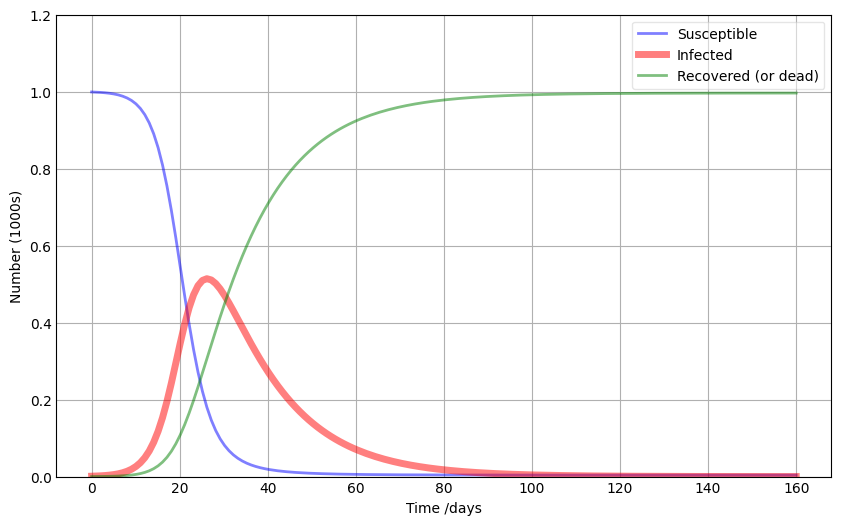

In [2]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(10,6))
ax = fig.add_subplot(111) # , axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=5, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered (or dead)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(True) # b=None, which='major', axis='both')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

## $\rightarrow$ Your turn!

- What is the effect of doubling "social distancing", e.g. let $\beta_{new} = 0.5 \beta_{old}$<br>


- Play with the other model parameters: **removal rate** of infectives $\gamma > 0$, and the **initial conditions** $S(0)=S_0 > 0$, $I(0)=I_0 > 0$ where $R(0) = 0$.


- Note that $\rho = \frac{\gamma}{\beta}$ is a critical parameter denoted the **relative removal rate**, and its reciprocal $\sigma = \frac{\beta}{\gamma}$ is the infection's **contact rate**. The term $R_0 = \frac{\beta S_0}{\gamma}$ is called  the **basic reproduction rate** of the infection, being the number of secondary infections produced by one primary infection in a wholly susceptible population.<br>


- What happens if 
  - $R_0 < 1$ ?
  - $R_0 = 1$ ? 
  - $R_0 > 1$ ?
  - $R_0 \gg 1$ ?


  HINT: explore (or modify) the function below.

In [3]:
def SIR_plot(N, S0, I0, R0, T, beta1, beta2, gamma1, gamma2):
    t = np.linspace(0, T, T)
    y0 = S0, I0, R0
    
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    ret1 = odeint(deriv, y0, t, args=(N, beta1, gamma1))
    S1, I1, R1 = ret1.T
    
    ret2 = odeint(deriv, y0, t, args=(N, beta2, gamma2))
    S2, I2, R2 = ret2.T
    
    
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    ax1.plot(t, S1/1000, 'b', alpha=0.5, ls='-', lw=1, label='Susceptible (beta1=%.2f, gamma1=%.2f)' % (beta1, gamma1))
    ax1.plot(t, I1/1000, 'r', alpha=0.5, ls='-', lw=5, label='Infected')
    ax1.plot(t, R1/1000, 'g', alpha=0.5, ls='-', lw=1, label='Recovered (or dead)')
    ax1.set_xlabel('Time /days')
    ax1.set_ylabel('Number (1K) SIR-model 1')
    ax1.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(True)
    legend1 = ax1.legend()
    legend1.get_frame().set_alpha(0.9)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.plot(t, S2/1000, 'b', alpha=0.5, ls='-.', lw=1, label='Susceptible (beta2=%.2f, gamma2=%.2f)' % (beta2, gamma2))
    ax2.plot(t, I2/1000, 'r', alpha=0.5, ls=':', lw=7, label='Infected')
    ax2.plot(t, R2/1000, 'g', alpha=0.5, ls='-.', lw=1, label='Recovered (or dead)')
    ax2.set_ylabel('Number (1K) SIR-model 2')
    ax2.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    legend2 = ax2.legend()
    legend2.get_frame().set_alpha(0.9)
    
    fig.tight_layout() 
    plt.show()

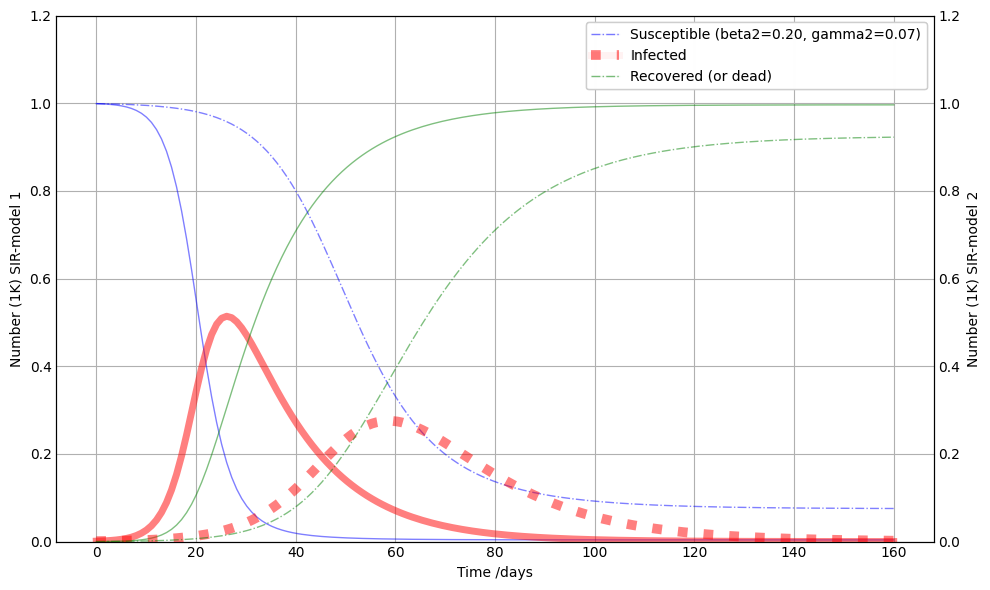

In [4]:
N = 1000          # total population
I0 = 1            # initial infected
R0 = 0            # initial recovered
S0 = N - I0 - R0  # initial susceptible
T = 160           # total observation time
beta1 = 0.4
beta2 = 0.20      # "flattening the curve"
D = 14            # duration of the infection (in days)
gamma1 = 1./D
gamma2 = gamma1

SIR_plot(N, S0, I0, R0, T, beta1, beta2, gamma1, gamma2)

In [5]:
# Your code here:

## Part 2 
### The spatio-temporal  _simulitis_ model  - moving from [ODE](https://en.wikipedia.org/wiki/Ordinary_differential_equation)s to [PDE](https://en.wikipedia.org/wiki/Partial_differential_equation)s

### The SIR model again
Our _simulitis_ outbreak will obey the [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics) (Wikipedia again) where the letters S, I and R reflects different states an individual can have in a _simulitis_ endemic (or, pandemic) disease [NOTE: a **pandemic** (from Greek πᾶν, pan, 'all' and δῆμος, demos, 'people') is an **epidemic** of disease that has spread across a large region, for instance multiple continents, or worldwide; a widespread **endemic** disease with a stable number of infected people is not a pandemic]:

  * $S$ for susceptible - number of healthy individuals that potentially could turn to _simulitis_
  * $I$ for infected - number of individuals with _simulitis_
  * $R$ for removed -  number of individuals that's out of the _simulitis_ disease - either recovered or died.
 
We assume $S'+ I'+ R' =0$, hence $S(t) + I(t) + R(t) \equiv const = N$ ("conservation of population")

We also have the model parameters $\beta$ and $\gamma$:

  * $\beta$ is how transmittable the disease is, the *effective contact rate* of *simulitis*: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to acquire the disease is $S/N$) [see also above]
  * $\gamma$ is how fast you go from _simulitis_ (S) to _removed_ (R) state, i.e. the *mean recovery rate* where $1/\gamma$ is the mean period of time during which an infected individual can pass it on before being recovered (or dead).
  
$S' = -\beta S I$ tells us how fast people are turning into _simulitis_. $S'$ being the time derivative.

$I' = \beta S I - \gamma I$ tells us how the infected increases and how fast the infected are transitioning into the _removed_ state.

$R' = \gamma I$ just picks up the $\gamma I$ term that was negative in the previous equation.

The above model does not take into account that there must be **spatial distribution of compartments S, I, R**. So let's fix that!

One approach is to divide Norway and the Nordic countries into **a grid where every cell can infect the nearby** (we are thus moving into 2D digital image processing and analysis!). This can be described as follows:

$$
\begin{align}
 f(u)   = u'(t)  = \begin{pmatrix} S' \\ I' \\ R' \end{pmatrix} = \begin{pmatrix}
  -\beta \left(S_{i,j}I_{i,j} + S_{i-1,j}I_{i-1,j} + S_{i+1,j}I_{i+1,j} + S_{i,j-1}I_{i,j-1} + S_{i,j+1}I_{i,j+1}\right)  \\
  \beta \left(S_{i,j}I_{i,j} + S_{i-1,j}I_{i-1,j} + S_{i+1,j}I_{i+1,j} + S_{i,j-1}I_{i,j-1} + S_{i,j+1}I_{i,j+1}\right) - \gamma I_{i,j}  \\
 \gamma I_{i,j}
\end{pmatrix} 
\end{align}
$$

Where $(i,j)$ represents indices (row and column) in a 2D array (image), and e.g. $S_{ij}$ being the current susceptible stock in cell (pixel) of interest and $S_{i-1,j}$, $S_{i+1,j}$, $S_{i,j-1}$, $S_{i,j+1}$ (or, $S_N$, $S_S$, $S_W$, $S_E$) being current suscptible stock in the surrounding cells (i.e. **first order neighbourhood** w.r.t [pixel connectivity](https://en.wikipedia.org/wiki/Pixel_connectivity)- the rightmost in the Figure below).

![neighborhood](./assets/first_second_order_neighborhood.png)

In this spatio-temporal framework we can inject a single "**patient zero**" at a specified cell, say $(i_0,j_0)$ at time $t=t_0$ for which $I(t_0) = 1$ and let the *simulitis* propagate, where we expect the infected population spreads out and more quickly through high population densities.<br>

For this model to be geographically (semi)realistic, we might employ a [**dasymetric map**](https://en.wikipedia.org/wiki/Dasymetric_map) (a type of [thematic](https://en.wikipedia.org/wiki/Thematic_map) map) showing the distribution of a variable (e.g. population density). This is spatially [more refined](https://www.tandfonline.com/doi/abs/10.1559/152304001782173727) than a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which only shows statistical data aggregated (uniformly) over predefined regions, assuming even distribution of the measured phenomenon within each region.

NOTE: These concepts also have a clear analogy with **image segmenation in MRI**, dealing with *multi-atlases* and various levels of *granularity*.

## Define our Python environment

In [6]:
%matplotlib inline
import numpy as np
import math
import os
from shutil import copyfile
import matplotlib.pyplot as plt    
from matplotlib import rcParams
import matplotlib.image as mpimg
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = 12, 8
from PIL import Image

Select some appropriate $\beta$ and $\gamma$ making sure to obtain a highly endemic situation.

NOTE:  $\beta = E \cdot p$,  where $E$ (exposure) can be related to "[social distancing](https://en.wikipedia.org/wiki/Social_distancing)" and $p$ (transmission probability) can be related to [hygiene](https://en.wikipedia.org/wiki/Hygiene),e.g. handwashing.

In [7]:
beta = 0.050       # the exposure-transmission probability (E p) product (default=0.010)
gamma = 1./0.3     # rate of recovery or mortality (default=1)
D = 0.025          # Diffusion coefficient in the spatial diffusion term (default=0.025)

### Numerical solution of ODEs

Remember the definition of a [derivative](https://en.wikipedia.org/wiki/Derivative)? With some rearranging it can actually be used to approximate  the next step of the function when the derivative is known and $\Delta t$ is assumed to be small. By definition of $u'(t)$:

$$ 
u'(t) = \mathop {\lim }\limits_{\Delta t \to 0} \frac{ {u\left( {t + \Delta t } \right) - u\left( t \right)}}{\Delta t}  $$ 

and, by ignoring the limit and rearranging,
$$ 
{u\left( {t + \Delta t } \right)} \approx u\left( t \right) + u' \Delta t$$ 

Remember from before:

$$  f(u)   = u'(t)$$

And let's call $u\left( {t + \Delta t } \right)$ which is the function $u$ in the next time step for $u_{n+1}$, and $u(t) = u_n$ which is the current time step, then

$$  u_{n+1} = u_n + f(u)\Delta t$$

This is called the [(Explicit) Forward Euler](http://en.wikipedia.org/wiki/Euler_method) method (FE), technically a truncated [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) expansion of $u(t)$ in 
the $\Delta t$-neighborhood of $t$. Often, the time increment from $t$ to $t + \Delta t$ is denoted $h$ (**step size**). We assume discrete time $t = t_0, t_1, \ldots, t_T$, where $t_0$ is the initial time, $u(t_0) = u_0$ the **initial condition**, $t_n = n\cdot h$, and $T$ the total observation time. Let's write it in code:

In [8]:
def euler_step(u, f, h):
    return u + h * f(u)

We also need $f(u)$ in code. This uses some nifty array operations by the goodness of numpy, given later.

### The spatial model - from ODEs to PDEs

Considering geographical spread, we introduce a positional variable $(x,y)$ to the model. This results in both
temporal and spatial variations. The difference from a standard ODE system is that a **diffusion** term (characterized with a fixed diffusion coefficient $D$) will be added to each equation, and we will need to introduce **[partial derivatives](https://en.wikipedia.org/wiki/Partial_derivative)**, i.e.

$$
\begin{eqnarray}
\frac{\partial S(x,y,t)}{\partial t} & = & -\beta SI + D\nabla^2 S \\
\frac{\partial I(x,y,t)}{\partial t} & = & \beta SI - \gamma I + D\nabla^2 I \\
\frac{\partial R(x,y,t)}{\partial t} & =  &\gamma I + D\nabla^2 R
\end{eqnarray}
$$


#### The 2D diffusion term

In general, the [**diffusion equation**](https://en.wikipedia.org/wiki/Diffusion_equation) is formulated as
$$
{\frac {\partial \phi (\mathbf {r} ,t)}{\partial t}}=\nabla \cdot {\big [}D(\phi ,\mathbf {r} )\ \nabla \phi (\mathbf {r} ,t){\big ]}
$$

where $\phi (\mathbf {r} ,t)$ is the density of the diffusing material (e.g. "stock of susceptible individuals") at location $\mathbf {r}$ and time $t$ and $D(\phi ,\mathbf {r} )$ is the collective diffusion coefficient (e.g. "ease of spread") for density $\phi$ at location $\mathbf {r}$; and *nabla* ($\nabla$) represents the [vector differential operator](https://en.wikipedia.org/wiki/Differential_operator). 

One of the most frequently seen differential operators, and the one being relevant here, is the [Laplacian operator](https://en.wikipedia.org/wiki/Laplace_operator), defined (in 2D+time) by

$$
\Delta =\nabla ^{2}= {\partial ^{2} \phi(x,y,t) \over \partial x^{2}} + {\partial ^{2} \phi(x,y,t) \over \partial y^{2}} = \phi_{xx} + \phi_{yy}.
$$

If the diffusion coefficient depends on the density then the equation is *nonlinear*, otherwise it is *linear* (as we will assume, i.e. all the compartments have the same [diffusion coefficient](https://en.wikipedia.org/wiki/Mass_diffusivity) $D$: $D(\phi ,\mathbf {r} ) \equiv D$ and *isotropic*, cfr. [Fick's second law](https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion)).

The 2D diffusion equation can then be written $$ u_{t} = D(u_{xx} + u_{yy})$$

assuming all the compartments have the same [diffusion coefficient](https://en.wikipedia.org/wiki/Mass_diffusivity) $D$.

Omitting some technicalities and introducing some simplifications, the system can be discretized with **[forward Euler](https://en.wikipedia.org/wiki/Euler_method) in time** and **[centered difference](https://en.wikipedia.org/wiki/Finite_difference) in space** (see also [Torbjørn P Seland](https://www.linkedin.com/in/torbj%C3%B8rn-seland-b0120533/?originalSubdomain=no). *Mathematical analysis of epidemic systems: Comparison of different models*. [MSc Thesis](https://www.duo.uio.no/bitstream/handle/10852/43534/TorbjornSelandThesis.pdf?sequence=1&isAllowed=y), University of Oslo, Decemeber 2014, Chapter 3), and with [Neumann boundary condition](https://en.wikipedia.org/wiki/Neumann_boundary_condition)

Our spatio-temporal model $f(u) = f(S, I, R)$ is then defined as (see [Max Bergren](https://github.com/maxberggren/blog-notebooks/blob/master/SweEbola.ipynb)) :

In [9]:
# No explicit diffusion coefficient
def ff(u):
    S = u[0]
    I = u[1]
    R = u[2]
    
    new = np.array([ -beta*(S[1:-1, 1:-1]*I[1:-1, 1:-1] + \
                            S[0:-2, 1:-1]*I[0:-2, 1:-1] + \
                            S[2:, 1:-1]*I[2:, 1:-1] + \
                            S[1:-1, 0:-2]*I[1:-1, 0:-2] + \
                            S[1:-1, 2:]*I[1:-1, 2:]),
                      beta*(S[1:-1, 1:-1]*I[1:-1, 1:-1] + \
                            S[0:-2, 1:-1]*I[0:-2, 1:-1] + \
                            S[2:, 1:-1]*I[2:, 1:-1] + \
                            S[1:-1, 0:-2]*I[1:-1, 0:-2] + \
                            S[1:-1, 2:]*I[1:-1, 2:]) - gamma*I[1:-1, 1:-1],
                      gamma*I[1:-1, 1:-1]
                    ])
    
    padding = np.zeros_like(u)
    padding[:,1:-1,1:-1] = new
    padding[0][padding[0] < 0] = 0
    padding[0][padding[0] > 255] = 255
    padding[1][padding[1] < 0] = 0
    padding[1][padding[1] > 255] = 255
    padding[2][padding[2] < 0] = 0
    padding[2][padding[2] > 255] = 255
    
    return padding

In [10]:
# With explicit D
def f(u):
    S = u[0]
    I = u[1]
    R = u[2]
    
    new = np.array([-beta*(S[1:-1, 1:-1]*I[1:-1, 1:-1] + \
                            S[0:-2, 1:-1]*I[0:-2, 1:-1] + \
                            S[2:, 1:-1]*I[2:, 1:-1] + \
                            S[1:-1, 0:-2]*I[1:-1, 0:-2] + \
                            S[1:-1, 2:]*I[1:-1, 2:]) + \
                            D*((S[2:, 1:-1] - 2*S[1:-1, 1:-1] + S[:-2, 1:-1]) + \
                              (S[1:-1, 2:] - 2*S[1:-1, 1:-1] + S[1:-1, :-2])),               
                      beta*(S[1:-1, 1:-1]*I[1:-1, 1:-1] + \
                            S[0:-2, 1:-1]*I[0:-2, 1:-1] + \
                            S[2:, 1:-1]*I[2:, 1:-1] + \
                            S[1:-1, 0:-2]*I[1:-1, 0:-2] + \
                            S[1:-1, 2:]*I[1:-1, 2:]) - gamma*I[1:-1, 1:-1] + \
                            D*((I[2:, 1:-1] - 2*I[1:-1, 1:-1] + I[:-2, 1:-1]) + \
                              (I[1:-1, 2:] - 2*I[1:-1, 1:-1] + I[1:-1, :-2])),
                      gamma*I[1:-1, 1:-1] + \
                            D*((R[2:, 1:-1] - 2*R[1:-1, 1:-1] + R[:-2, 1:-1]) + \
                              (R[1:-1, 2:] - 2*R[1:-1, 1:-1] + R[1:-1, :-2]))
                    ])
    
    padding = np.zeros_like(u)
    padding[:,1:-1,1:-1] = new
    padding[0][padding[0] < 0] = 0
    padding[0][padding[0] > 255] = 255
    padding[1][padding[1] < 0] = 0
    padding[1][padding[1] > 255] = 255
    padding[2][padding[2] < 0] = 0
    padding[2][padding[2] > 255] = 255
    
    return padding

### Population density maps

Here we import a map with the (not so recent) **population density  of the Nordic countries** and downsample it to make the solving time reasonably fast.<br>
Alternatively, for simulation purposes, we could be using [Perlin noise](https://en.wikipedia.org/wiki/Perlin_noise) to produce natural appearing textures on computer generated surfaces for image [synthesis](https://en.wikipedia.org/wiki/Texture_synthesis).

/tmp/ipykernel_17261/3583839693.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a+xmn)
/tmp/ipykernel_17261/3583839693.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(b+ymn)


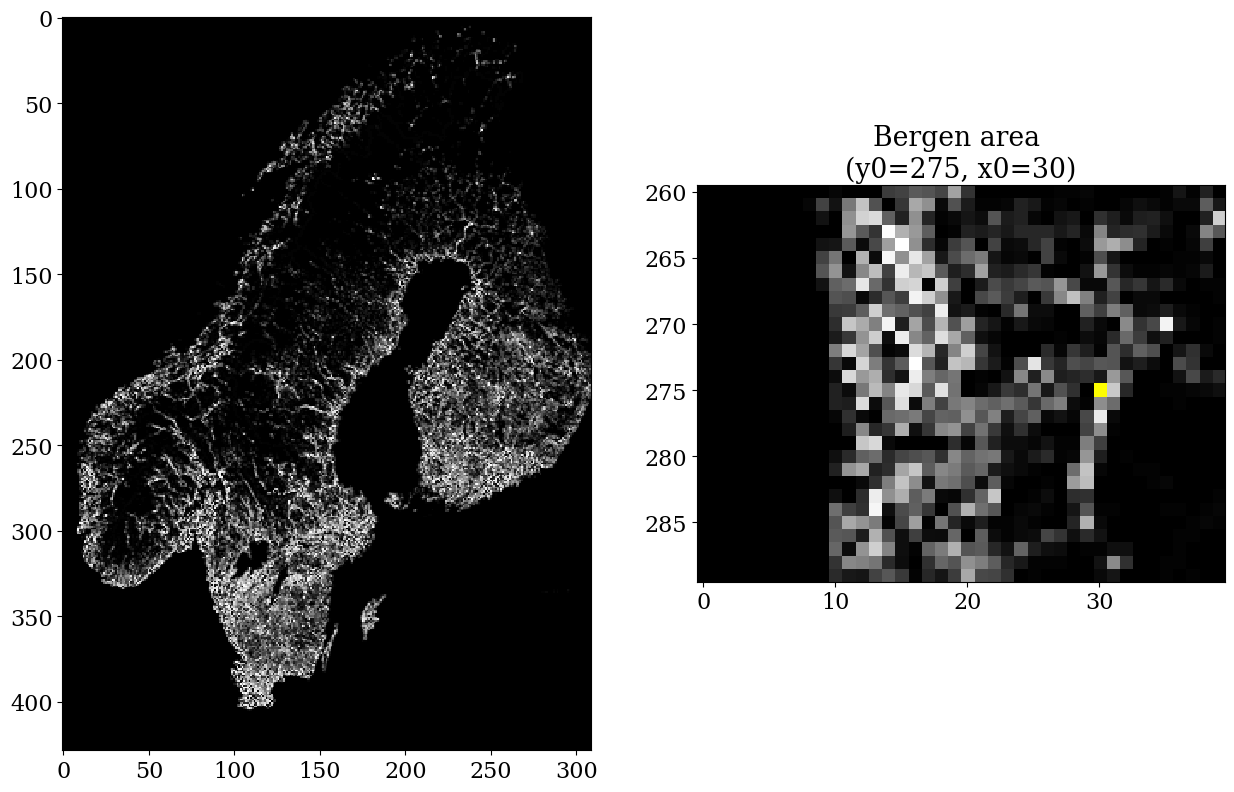

In [11]:
from PIL import Image
img = Image.open('./assets/popdens2.png')
img = img.resize((img.size[0]//2,img.size[1]//2)) # down-sampling
img = 255 - np.asarray(img)

fig = plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
imgplot1 = plt.imshow(3*img)
imgplot1.set_interpolation('nearest')

# Bergen area
xmn, xmx = 0, 40
ymn, ymx = 260, 290
# Patient zero cell (to be marked red)
y0, x0 = 275, 30

img_bergen = img[ymn:ymx, xmn:xmx]
img_bergen[y0-ymn,x0-xmn,0] = 255
img_bergen[y0-ymn,x0-xmn,1] = 255
img_bergen[y0-ymn,x0-xmn,2] = 0

ax = plt.subplot(1, 2, 2)
imgplot2 = plt.imshow(3*img_bergen)
imgplot2.set_interpolation('nearest')

a=ax.get_xticks().astype(int)
ax.set_xticklabels(a+xmn)

b=ax.get_yticks().astype(int)
ax.set_yticklabels(b+ymn)

plt.title("Bergen area \n(y0=%d, x0=%d)" % (y0, x0))

plt.show()

**Population density in the Nordic countries (Denmark is missing)**<br>
 [ pop_sw = 10100000, pop_fi =  5500000, pop_no =  5400000 ]

Our $S$ matrix, the susceptible individuals should be something like the population density. The infected $I$ is for now just zeros. But let's put a **patient zero** somewhere in Bergen (or Stockholm).

In [12]:
S_0 = img[:,:,1]
I_0 = np.zeros_like(S_0)
I_0[y0, x0] = 1 # patient zero  cell (in the Bergen area)

Nobody is dead due to *simulitis*, yet. So we put $R$ to zeroes too.

In [13]:
R_0 = np.zeros_like(S_0)

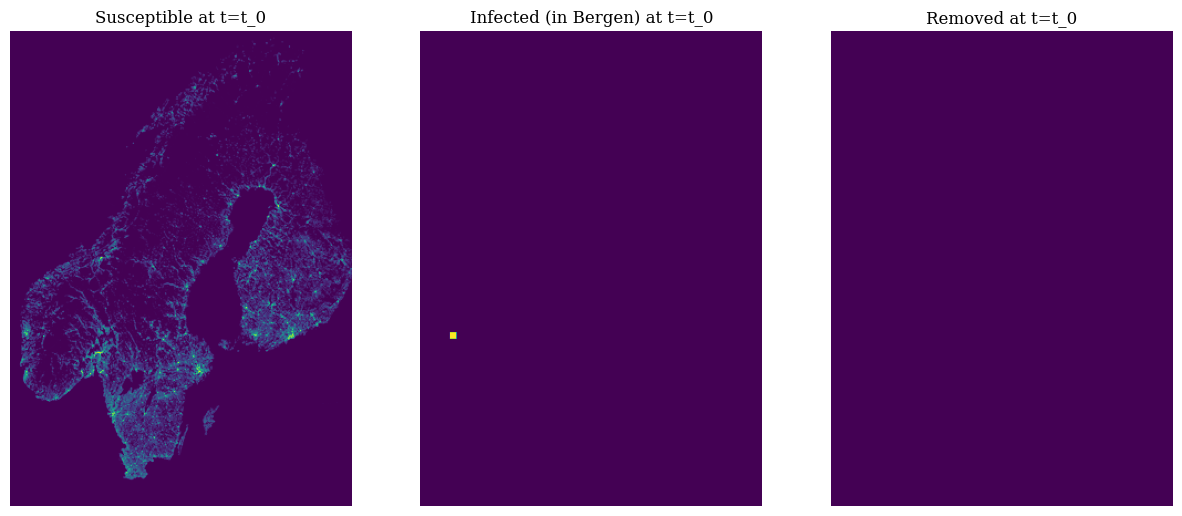

In [14]:
# Display S, I, R at initial condition t=t_0
fig = plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.imshow(S_0)
plt.title("Susceptible at t=t_0", fontsize=12)
plt.axis('off')

I_0n = np.zeros_like(S_0)
I_0n[y0-3:y0+3, x0-3:x0+3] =255
plt.subplot(1, 3, 2)
plt.imshow(I_0n)
plt.title("Infected (in Bergen) at t=t_0", fontsize=12)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(R_0)
plt.title("Removed at t=t_0", fontsize=12)
plt.axis('off')

plt.show()

Now set some initial values of how long the simulation is to be run and more.

In [15]:
T = 900                         # final time (default=900)
h = 1                           # time increment  (default=1)
nT = int(T/h) + 1               # number of time-steps
t = np.linspace(0.0, T, nT)     # time discretization

# initialize the array containing the solution for each time-step
u = np.empty((nT, 3, S_0.shape[0], S_0.shape[1]))
u[0][0] = S_0
u[0][1] = I_0
u[0][2] = R_0
u.shape

(901, 3, 429, 309)

We need to make a custom colormap so that the infected matrix can be overlayed on the map.

In [16]:
import matplotlib.cm as cm
theCM = cm.get_cmap("Reds")
theCM._init()
alphas = np.abs(np.linspace(0, 1, theCM.N))
theCM._lut[:-3,-1] = alphas

And we wait for the _simulitis_ to propagate ...

In [17]:
%%time
for n in range(nT-1):
    u[n+1] = euler_step(u[n], f, h)

CPU times: user 4.21 s, sys: 198 ms, total: 4.41 s
Wall time: 4.42 s


No let's render some images and make an animated gif of it.

In [18]:
keyFrames = []
frames = 50.0  # default=60

for i in range(0, nT-1, int(nT/frames)):
    fig = plt.figure()
    imgplot = plt.imshow(img, vmin=0, vmax=255)
    imgplot.set_interpolation("nearest")
    imgplot = plt.imshow(u[i][1], vmin=0, cmap=theCM)  # The I(t=t_i)
    imgplot.set_interpolation("nearest")
    plt.axis('off')
    filename = "./tmp/outbreak" + str(i) + ".png"
    plt.savefig(filename)
    plt.close(fig)
    keyFrames.append(filename)

In [19]:
import imageio
images = []
for filename in keyFrames:
    images.append(imageio.imread(filename))
imageio.mimsave('./assets/outbreak.gif', images)

/tmp/ipykernel_17261/3835013694.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [20]:
# We can now remove the .png frames and copy the animated gif to assets (faking a .png for display)
for i, f in enumerate(keyFrames):
    os.remove(f)
copyfile('./assets/outbreak.gif', './assets/outbreak-simulitis-gif.png');

### Outbreak of _simulitis_ starting in Bergen:

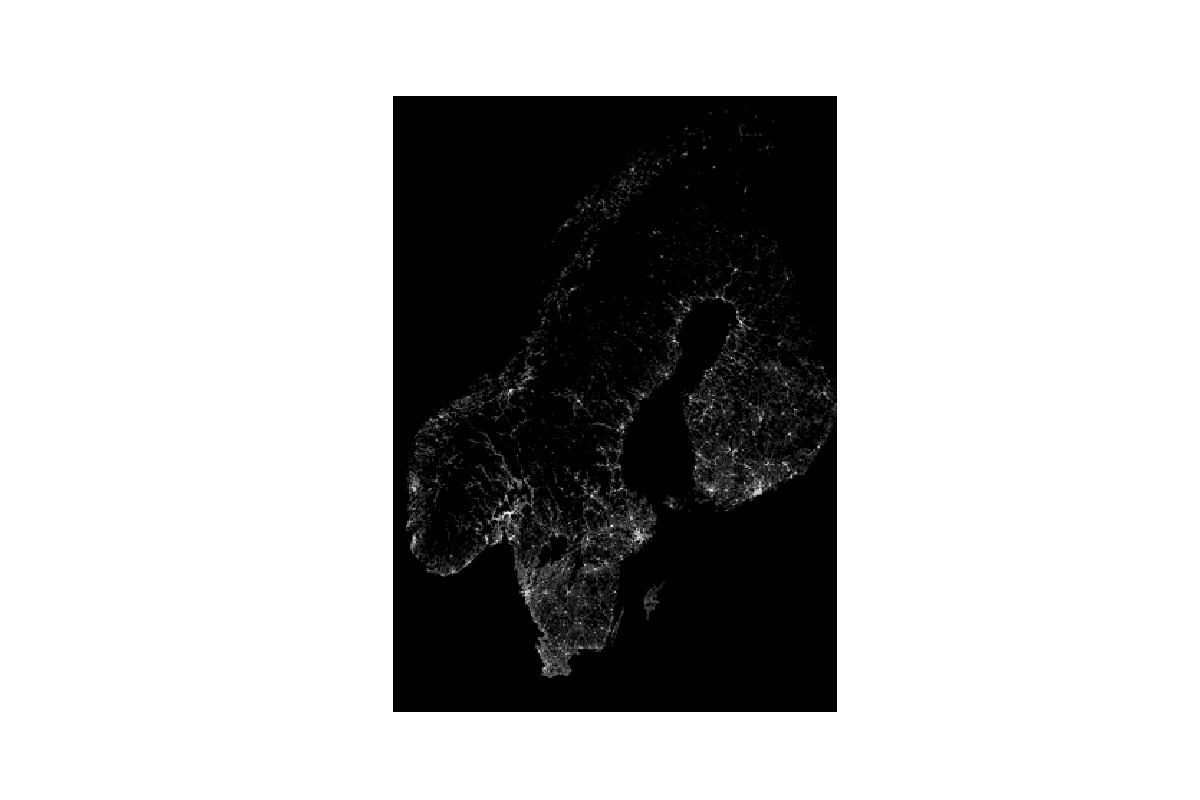

In [21]:
import IPython
IPython.display.Image("./assets/outbreak-simulitis-gif.png", width="100%")
#![outbreak](./assets/outbreak.gif)

The only safe place seems to be in the northern parts where it's not so densly populated. Even Finland will at the end of the animation be infected.

## $\rightarrow$ Your turn!

- Let patient zero be located in **Stockholm** (i.e. I_0[309,170] = 1) instead of **Bergen**


- Test the effect av varying "social distancing" ($E$) and "handwashing" ($p$), i.e. $\beta$  ($= E p$), and the parameter $\gamma$ in the SIR model

# A final reflection:

![a_reflection_by_wigner](./assets/a_reflection_by_wigner.png)

(E. Wigner, 1960: “[The unreasonable effectiveness of mathematics in the natural sciences](https://www.maths.ed.ac.uk/~v1ranick/papers/wigner.pdf)”)
